<a href="https://colab.research.google.com/gist/YangliuF95/697d38ba6752d23f73c00008a69f1bdf/analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cate_year=pd.read_csv("/content/drive/My Drive/Colab Notebooks/node_attrs.csv")
cate_bc=pd.read_csv("/content/drive/My Drive/Colab Notebooks/node_attrs_bc.csv")
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/wos.csv')

# Overview of the dataset

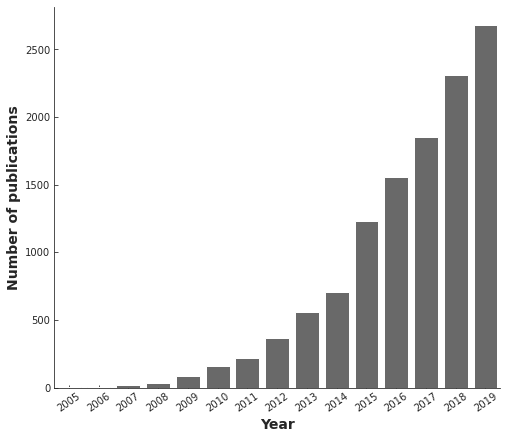

In [5]:
# number of publications overtime
for i in data[data.Year==2020.0].index:   #early access
  data.loc[i,'Year']=2019.0
year=[]
for i in range(len(data)):
    try:
        year.append(int(data.Year[i]))
    except:
        pass
y=[(i,(year.count(i))) for i in year]
plt.figure(figsize=(8,7))
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
sns.barplot(x=[i[0] for i in set(y)],y=[i[1] for i in set(y)],dodge=False, color='dimgrey')
plt.xticks(rotation=35)
sns.despine()
#plt.ylim((0,3000))
plt.ylabel('Number of publications', fontsize=14,fontweight='bold')
plt.xlabel('Year', fontsize=14,fontweight='bold')
plt.show()

In [6]:
#get the disciplines from WoS catetories
#only the first category
disciplines=[]
keywords=[]
for i in range(len(data)):
  b=np.nan
  try:
    a=data.Categories[i].lower().replace('\\','').replace('"','').replace("'","").replace(";",",").split(', ')[0]
    b=data.Keywords[i].lower().replace('\\','').replace('"','').replace("'","").replace(";",",").split(', ')[0]
  except:
    pass
  disciplines.append(a)
  keywords.append(b)


In [7]:
discipline=['public, environmental & occupational health' if i=='public' else i for i in disciplines]
data['discipline']=discipline

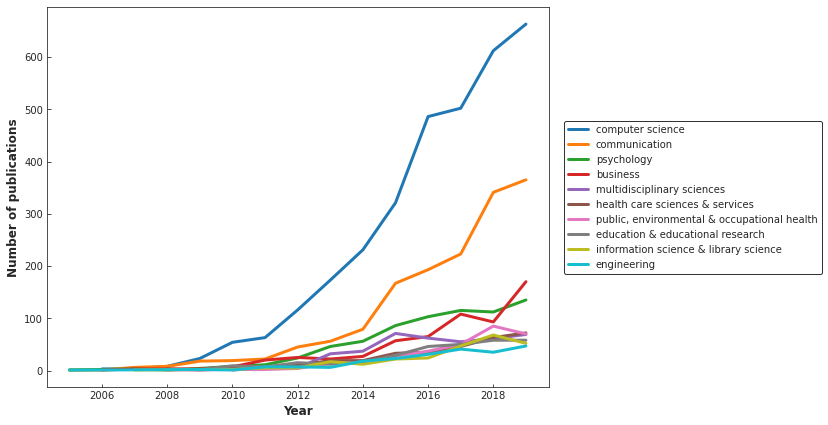

In [10]:
# number of publications overtime according to the disciplines
import math
df=pd.DataFrame()
df['Discipline']=data.discipline
df['year']=[i if math.isnan(i) else int(i) for i in data.Year] #solve nan 
ls=df.groupby('Discipline').year.count().to_frame().sort_values(by='year',ascending=False).index.to_list()[:10]
a=list(sns.color_palette("tab10", n_colors=len(ls)))
plt.figure(figsize=(9,7))
for i in range(len(ls)):
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.lineplot(data=df[df['Discipline'] == ls[i]].groupby('year').Discipline.count().reset_index(), color=a[i],x='year',y='Discipline', linewidth = 3, label=ls[i])
legend=plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
legend.get_frame().set_edgecolor('black')
plt.ylabel('Number of publications', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.show()

# Disciplinary composition

In [46]:
# The disciplinary compostion of ten clusters in the networks
# write a function for the stacked bar
def stacked_bar(dfs,cluster, Title,alpha=True):
  df=dfs.dropna(subset=[cluster])[['Background',cluster,Title]] #find the cluster and background
  df[cluster]=[int(i) for i in df[cluster]] #cluster to int
  if alpha:
    df_fraction=df[df[cluster].isin(range(11))].groupby([cluster,'Background']).count().\
    div(df.groupby([cluster]).count()) # calculate the fraction of discipline in each cluster
    data_1=df_fraction.drop(columns=['Background']) #drop the extra column
    data_1.columns=['Discipline']
    data_1=data_1.unstack().fillna(0) #unstack 
    for j in range(1,11): #to merge the disciplines with fraction smaller than 0.01 as others
      m=j-1
      bg=data_1.iloc[m].reset_index()[data_1.iloc[m].reset_index()[j]>0.015].Background.to_list() 
      df_1=df[df[cluster]==j]
      for i in df_1.index:
        if df_1.loc[i,'Background'] not in ls_1:
          df.loc[i,'Background']='others'
  df_fraction=df[df[cluster].isin(range(11))].groupby([cluster,'Background']).count().\
  div(df.groupby([cluster]).count()) # calculate the fraction of discipline in each cluster
  data_1=df_fraction.drop(columns=['Background']) #drop the extra column
  data_1.columns=['Discipline']
  data_1=data_1.unstack().fillna(0) #unstack 
  data_1=data_1.T.sort_values(by=[1],ascending=False).T #sort by the fraction in the biggest cluster
  if alpha:
    reorder=[data_1.T.index[i] for i in range(len(data_1.T.index))  if data_1.T.index[i][1] != 'others']+[ (data_1.T.index[0][0],'others')]
  #put others in the last column
    data_1=data_1.T.reindex(reorder).T
  return data_1

In [11]:
cate_year['Background']=['public, environmental & occupational health' if i=='public' else i for i in cate_year.Background.to_list()]
cate_bc['Background']=['public, environmental & occupational health' if i=='public' else i for i in cate_bc.Background.to_list()]

In [12]:
cate_year['Background']=[i.replace('&','\n&') for i in cate_year.Background.to_list()]

In [72]:
data_1=stacked_bar(cate_year,'Period_3_commu_internal','Index',alpha=True)
data_2=stacked_bar(cate_year,'Period_3_commu','Index',alpha=True)
data_3=stacked_bar(cate_bc,'Period_3_commu','Index',alpha=True)

In [43]:
# find some dominant fields
ls=data_1.T.sort_values(by=[2],ascending=False).index
re=list(ls)
ls_1=[i[1] for i in ls]
ls_1

['communication',
 'political science',
 'computer science',
 'psychology',
 'others',
 'business',
 'multidisciplinary sciences',
 'information science \n& library science',
 'social sciences',
 'cultural studies',
 'hospitality',
 'management',
 'mathematics',
 'environmental studies',
 'physics',
 'criminology \n& penology',
 'geography',
 'gastroenterology \n& hepatology',
 'urban studies',
 'dermatology',
 'surgery',
 'education',
 'nursing',
 'ecology',
 'emergency medicine',
 'education \n& educational research',
 'hematology',
 'biodiversity conservation',
 'green \n& sustainable science \n& technology',
 'geosciences',
 'otorhinolaryngology',
 'health care sciences \n& services',
 'biotechnology \n& applied microbiology',
 'medicine',
 'substance abuse',
 'oncology',
 'psychiatry',
 'behavioral sciences',
 'cardiac \n& cardiovascular systems',
 'environmental sciences',
 'rheumatology',
 'health policy \n& services',
 'clinical neurology',
 'dentistry',
 'engineering',
 'radio

In [73]:
#re=[re[i] for i in range(len(re))  if re[i][1] != 'others']+[ (re[0][0],'others')]
data_1=data_1.T.reindex(re).T
#data_1=data_1.dropna(axis=1, how='all')
data_2=data_2.T.reindex(re).T
#data_2=data_2.dropna(axis=1, how='all')
data_3=data_3.T.reindex(re).T

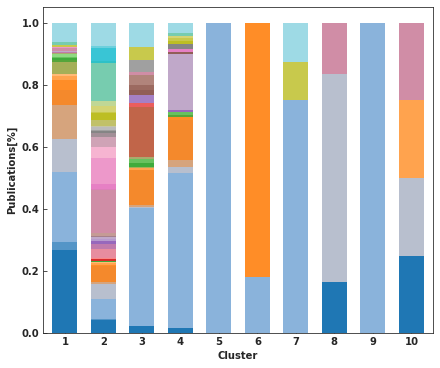

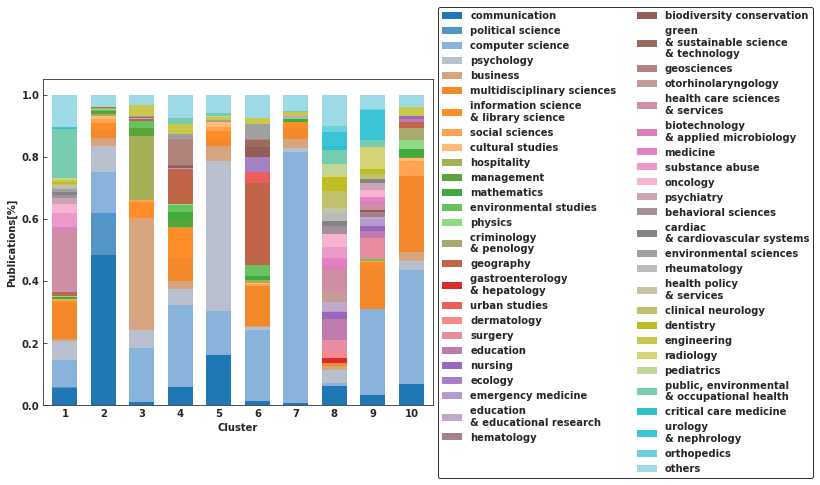

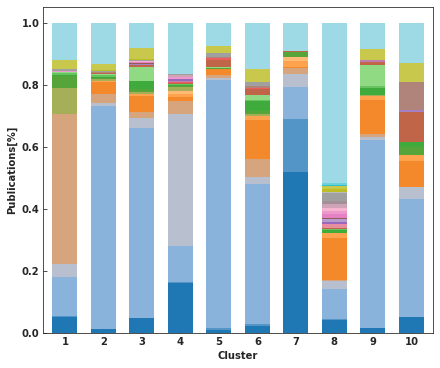

In [87]:
plt.figure(figsize=(20,15))
fig,ax= plt.subplots(nrows=3, ncols=1)
colors = sns.color_palette("tab20", n_colors=20)
rcParams['figure.figsize'] = 7,6
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
data_ls=[data_1,data_2,data_3]
for i in range(len(ax)):
  ax[i]=data_ls[i].plot(kind='bar',stacked=True,colormap=LinearSegmentedColormap.from_list("my_colormap", colors),width=0.65,edgecolor = "none",legend=False)
  mylabels=[data_ls[i].columns [j][1] for j in range(len(data_ls[i].columns))]
  plt.xticks(rotation='horizontal',fontweight='bold')
  plt.yticks(fontweight='bold')
  plt.xlabel('Cluster',fontweight='bold')
  plt.ylabel('Publications[%]',fontweight='bold')
  legend_properties = {'weight':'bold'}
  if i==1:
    legend=ax[i].legend(labels=mylabels,loc='center left', bbox_to_anchor=(1, 0.5), ncol=2,prop=legend_properties)
    legend.get_frame().set_edgecolor('black')
plt.show()


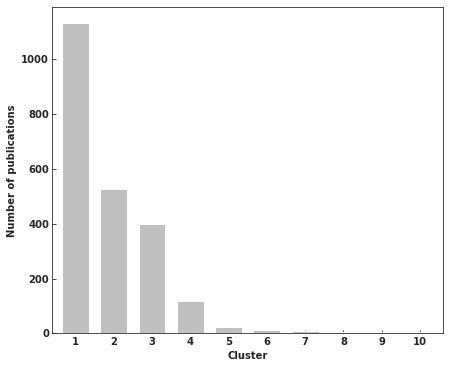

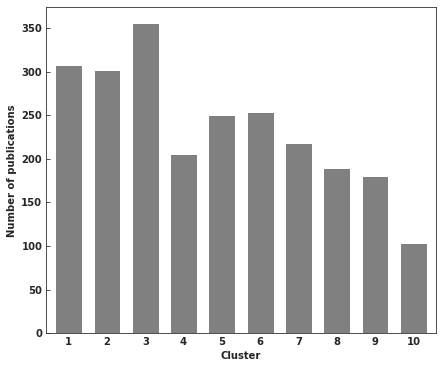

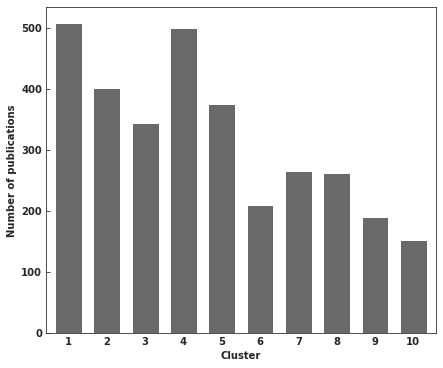

In [119]:
# number of papers across clusters
def count(df, column):
  df[column]=[int(eval(str(i))) if str(i) not in 'nan' else str(i) for i in df[column]]
  data=df[df[column].isin([i for i in range(11)])].sort_values(by=[str(column)]).groupby([str(column)]).Background.count()
  return data
ls_data=[count(cate_year,'Period_3_commu_internal'),count(cate_year,'Period_3_commu'),count(cate_bc,'Period_3_commu')]  
ls_data[0].plot(kind='bar',color='silver',width=0.7)
plt.xlabel('Cluster',fontweight='bold')
plt.ylabel('Number of publications',fontweight='bold')
plt.xticks(rotation='horizontal',fontweight='bold')
plt.yticks(rotation='horizontal',fontweight='bold')
plt.show()
ls_data[1].plot(kind='bar',color='grey',width=0.7)
plt.xlabel('Cluster',fontweight='bold')
plt.ylabel('Number of publications',fontweight='bold')
plt.xticks(rotation='horizontal',fontweight='bold')
plt.yticks(rotation='horizontal',fontweight='bold')
plt.show()
ls_data[2].plot(kind='bar',color='dimgray',width=0.7)
plt.xlabel('Cluster',fontweight='bold')
plt.ylabel('Number of publications',fontweight='bold')
plt.xticks(rotation='horizontal',fontweight='bold')
plt.yticks(rotation='horizontal',fontweight='bold')
plt.show()

# null model

In [141]:
#@title null model variant
# randomly shuffle the background for 1000 times 
cate_year['Period_3_commu']=cate_year['Period_3_commu'].replace('nan', np.nan)
null=cate_year.dropna(subset=['Period_3_commu']).reset_index(drop=True)[['Index','Period_3_commu','Background']].reset_index(drop=True)
for i in range(1000):
  commu=null.Background.to_list()
  random.shuffle(commu)
  null['Shuffle_commu'+str(i)]=commu

In [149]:
# z test and p value
import scipy
def check(n):
  dis=null[null.Period_3_commu==n].Background.unique()
  for i in dis:
    observed=null[null['Period_3_commu'].isin([n])&null.Background.isin([str(i)])].Background.count()
    allc=[]
    for k in range(1000):
      allc.append(null[null['Shuffle_commu'+str(k)].isin([str(i)])&null.Period_3_commu.isin([n])].Background.count())
    z=(observed-np.mean(allc))/np.std(allc)
    p=scipy.stats.norm.sf(abs(z))*2
    if z>0 and p<0.05:
      print("discipline ", i)
      print("z score is", z, "p value is",p)

In [150]:
print(check(1))

discipline  multidisciplinary sciences
z score is 5.863294430689557 p value is 4.537725434105023e-09
discipline  public, environmental 
& occupational health
z score is 13.038625563150417 p value is 7.377499591727945e-39
discipline  health care sciences 
& services
z score is 17.217460807183482 p value is 1.9641843356867242e-66
discipline  endocrinology 
& metabolism
z score is 5.664254398025217 p value is 1.4766519473646434e-08
discipline  cardiac 
& cardiovascular systems
z score is 3.05061841045234 p value is 0.00228370610991542
discipline  substance abuse
z score is 5.679487434595608 p value is 1.3509897388726122e-08
discipline  rehabilitation
z score is 3.9936390100224233 p value is 6.506690255288439e-05
discipline  behavioral sciences
z score is 3.055557690172329 p value is 0.002246423813816844
discipline  mathematical 
& computational biology
z score is 2.8306527942857183 p value is 0.0046453117566571415
discipline  oncology
z score is 6.216829127039024 p value is 5.073016711815

In [152]:
#@title configuration null model

#edges swap
G = nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/G3.edgelist", nodetype=int) 
G_null=G.copy()
alcc=nx.average_clustering(G)
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
GCC = max(connected_component_subgraphs(G),key=len)
aspl=nx.average_shortest_path_length(GCC)
from tqdm import tqdm
alcc_0 = []
aspl_0=[]
for _ in tqdm(range(100)):
    G_s = nx.double_edge_swap(G_null.copy(), nswap=100, max_tries=200)
    alcc_s = nx.average_clustering(G_s)
    GCC = max(connected_component_subgraphs(G_s),key=len)
    aspl_s=nx.average_shortest_path_length(GCC)
    aspl_0.append(aspl_s)
    alcc_0.append(alcc_s)

100%|██████████| 100/100 [2:00:47<00:00, 72.47s/it]


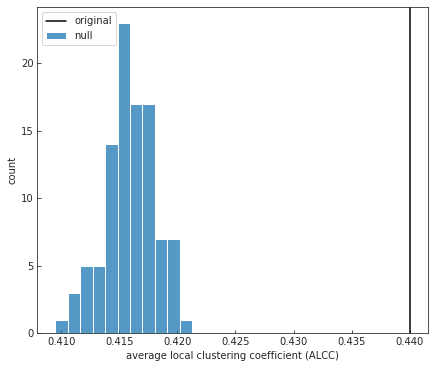

In [161]:
import seaborn as sns
sns.histplot(alcc_0,label='null')
plt.axvline(alcc,color='black',label='original')
plt.legend()
plt.xlabel('average local clustering coefficient (ALCC)')
plt.ylabel('count')
plt.show();

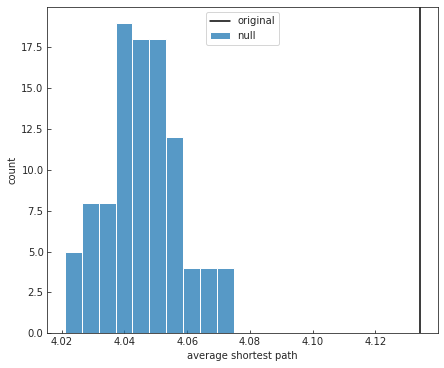

In [159]:
sns.histplot(aspl_0,label='null')
plt.axvline(aspl,color='black',label='original')
plt.legend()
plt.xlabel('average shortest path')
plt.ylabel('count')
plt.show()

# Alluvial diagram

In [162]:
import plotly.graph_objects as go
import matplotlib as mpt

In [ ]:
#@title internal to external
cate_year_1=cate_year.dropna(subset=['Period_3_commu'])
cate_year_1.Period_3_commu=cate_year_1.Period_3_commu.astype(int)
df=pd.DataFrame(columns=['source','target'])
df2=cate_year_1.dropna(subset=['Period_3_commu_internal'])[['Period_3_commu','Period_3_commu_internal']].reset_index()

In [183]:
# flow list
a=0
for i in df2.Period_3_commu_internal.unique():
  t1=df2[df2.Period_3_commu_internal==float(i)].groupby('Period_3_commu').size().index.to_list()
  v1=df2[df2.Period_3_commu_internal==float(i)].groupby('Period_3_commu').size().to_list()
  for j in range(len(t1)):
    df.loc[a+j,'source']='IC'+str(int(i))
    df.loc[a+j,'target']='EC'+str(t1[j])
    df.loc[a+j,'value']=v1[j]
  a=len(df)

In [179]:
#label list
label=dict()
label['IC1']='Interdisciplinary socio-cultural sciences'
label['IC2']='Health sciences'
label['IC3']='Geo-informatics'
label['EC1']='Health-related1'
label['EC2']='Communication-political science'
label['EC3']='Business-hospitality'
label['EC5']='Psychology'
label['EC7']='Computer science'
label['EC4']='Geosciences'
label['EC6']='Geography'
label['EC8']='Health-related2'
label['EC10']='Multidisciplinary sciences'
label['EC9']='Health-related3'

In [ ]:
# color list
df_1=df[df.value>10] # hide small clusters
ls=['tab:purple','darkgrey','limegreen','gold','tab:orange','tab:blue']
ls_1=['thistle','lightgrey','lightgreygreen','palegoldenrod','bisque','lightblue']
node_1=dict()
source=list(df_1.sort_values(by=['source'],ascending=False).source.unique())
for i in range(len(source)):
  if ls_1[i]=='lightgreygreen':
    node_1[source[i]]='#b7e1a1'
  else:
    node_1[source[i]]=mpt.colors.to_hex(ls_1[i])
df_1["color"]=df_1.source.apply(lambda x:node_1[x])
# assign nodes colors
from matplotlib.colors import rgb2hex
color=[mpt.colors.to_hex(i) for i in ls]+rgb_hex(np.array(sns.color_palette("twilight", 43-6)))
node=dict()
label=list(df_1.source.unique())+list(df_1.target.unique())
for i in range(43):
  node[label[i]]=color[i]

In [196]:
# visualization
df_1=df_1.sort_values(by=['source'],ascending=False)
t=df_1.source.to_list()+ [i for i in df_1.target.to_list()]
layout =  dict(
title = "",
font = dict(
  size = 9.5
 ),
    annotations=[
        dict(
            x=0.25,
            y=0.75,
            text='',
            showarrow=False
        ),
        dict(
            x=0.75,
            y=0.25,
            text='',
            showarrow=False
        )
    ]
 )
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(width = 0.5),
      label = t,
      color= [node[i] for i in t]
    ),
    link = dict(
      source = [t.index(i) for i in df_1.source.to_list()],
      target = [t.index(i) for i in df_1.target.to_list()],
      value = df_1.value.to_list(),
      color= df_1.color.to_list()
  ))],layout=layout)
fig.show()

In [197]:
#@title dynamic network
# network construction 
within=pd.read_csv("/content/drive/My Drive/Colab Notebooks/within_co_ci.csv")
full=pd.read_csv("/content/drive/My Drive/Colab Notebooks/full_co_ci.csv")

In [198]:
within['Year_range']=[np.ceil((i-2004)/5) if i <2019 else 3.0 for i in within.Year]
full['Year_range']=[np.ceil((i-2004)/5) if i <2019 else 3.0 for i in full.Year]

In [216]:
edges=pd.concat([within,full]).reset_index(drop=True)
edges_df_1=edges[edges.Year_range==1.0].reset_index(drop=True)
ls=edges_df_1.c1.to_list()+edges_df_1.c2.to_list()
edges_df_2=edges[edges.Year_range.isin([2.0 ])].reset_index(drop=True)
edges_df_3=edges[edges.Year_range.isin([3.0])].reset_index(drop=True)
edges_df_2=edges_df_2[edges_df_2.c1.isin(ls)&edges_df_2.c2.isin(ls)].reset_index(drop=True)
edges_df_3=edges_df_3[edges_df_3.c1.isin(ls)&edges_df_3.c2.isin(ls)].reset_index(drop=True)
def df_to_list(df):
  return [(int(df.iloc[i].to_list()[0]),int(df.iloc[i].to_list()[1])) for i in range(len(df))]
edges_list_1=df_to_list(edges_df_1)
edges_list_2=df_to_list(edges_df_2)
edges_list_3=df_to_list(edges_df_3)
def weighted_networks(list):
  count=dict(Counter(list))
  edges_co=[(i+(count[i],)) for i in count]
  G=nx.Graph()
  G.add_weighted_edges_from(edges_co)
  return G

In [217]:
G1=weighted_networks(edges_list_1)
G2=weighted_networks(edges_list_2)
G3=weighted_networks(edges_list_3)

In [210]:
!pip install infomap
def community(edges_list):
  G=nx.Graph()
  G.add_edges_from([i for i in edges_list])
  im = infomap.Infomap()
  im.add_links(G.edges())
  im.run()
  communities = im.get_modules()
  nx.set_node_attributes(G, communities, 'community')
  print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
  return G,communities

     |████████████████████████████████| 279 kB 5.1 MB/s 
  Created wheel for infomap: filename=infomap-1.7.0-cp37-cp37m-linux_x86_64.whl size=5816773 sha256=7e3061b5ea5504e3213a279276e71522f13127c04fd900882806b63bd1b0b278
  Stored in directory: /root/.cache/pip/wheels/05/70/1e/0563b82d2812f50510e1b6b76dfb2dd75b22b4b776b3c1ebb4
Successfully built infomap


In [218]:
import infomap
links=[(int(i),int(j)) for i,j in G1.edges()]
G1,communities=community(links)
links=[(int(i),int(j)) for i,j in G2.edges()]
G2,communities=community(links)
links=[(int(i),int(j)) for i,j in G3.edges()]
G3,communities=community(links)

Found 8 modules with codelength: 4.228097616925863
Found 5 modules with codelength: 4.842540676548175
Found 4 modules with codelength: 4.563577086520208


In [219]:
#within dataset co-citation cmmunities first period
cate_year['Period_1_commu']=[str(G1.nodes[i]['community']) if i in G1.nodes() else np.nan for i in cate_year.Index]
cate_year['Period_2_commu']=[str(G2.nodes[i]['community']) if i in G2.nodes() else np.nan for i in cate_year.Index]
cate_year['Period_3_commu']=[str(G3.nodes[i]['community']) if i in G3.nodes() else np.nan for i in cate_year.Index]

In [220]:
#alluvial diagram
df1=cate_year.dropna(subset=['Period_1_commu'])[['Period_3_commu','Period_1_commu','Period_2_commu']].reset_index()
df2=cate_year.dropna(subset=['Period_1_commu'])[['Period_3_commu','Period_1_commu','Period_2_commu']].reset_index()
df3=cate_year.dropna(subset=['Period_1_commu'])[['Period_3_commu','Period_1_commu','Period_2_commu']].reset_index()

In [227]:
#flow change
df=pd.DataFrame(columns=['source','target'])
a=0
for i in df1.Period_1_commu.unique():
  t1=df1[df1.Period_1_commu==i].groupby('Period_2_commu').size().index.to_list()
  v1=df1[df1.Period_1_commu==i].groupby('Period_2_commu').size().to_list()
  for j in range(len(t1)):
    df.loc[a+j,'source']='T1C'+str(int(i))
    df.loc[a+j,'target']='T2C'+str(int(t1[j]))
    df.loc[a+j,'value']=v1[j]
  a=len(df)
for i in df2.dropna(subset=['Period_1_commu']).Period_2_commu.unique():
  t1=df2.dropna(subset=['Period_1_commu'])[df2.Period_2_commu==i].groupby('Period_3_commu').size().index.to_list()
  v1=df2.dropna(subset=['Period_1_commu'])[df2.Period_2_commu==i].groupby('Period_3_commu').size().to_list()
  for j in range(len(t1)):
    df.loc[a+j,'source']='T2C'+str(int(i))
    df.loc[a+j,'target']='T3C'+str(int(t1[j]))
    df.loc[a+j,'value']=v1[j]
  a=len(df)

In [228]:
#color list
t=df.source.to_list()+ [i for i in df.target.to_list()]
cs= ['rgb'+str(i) for i in sns.color_palette("cubehelix", n_colors=len(set(t)))]+['rgb'+str(i) for i in sns.color_palette("Spectral", n_colors=len(set(t)))]\
+['rgb'+str(i) for i in sns.color_palette("viridis", n_colors=len(set(t)))]
colors={}
a=0
for i in sorted(list(set(t))):
  colors[i]=cs[a]
  a+=2

In [229]:
# visualization
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(width = 0.5),
      label = t,
      color= [colors[i] for i in t]
    ),
    link = dict(
      source = [t.index(i) for i in df.source.to_list()], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [t.index(i) for i in df.target.to_list()],
      value = df.value.to_list()
  ))])


fig.show()

In [231]:
#draw newtorks using the same color
from fa2 import ForceAtlas2
def force_pos(G):
  forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)
  pos=forceatlas2.forceatlas2_networkx_layout(G, pos=nx.spring_layout(G), iterations=100)
  return pos

In [237]:
pos=force_pos(G1)

100%|██████████| 100/100 [00:00<00:00, 7768.96it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


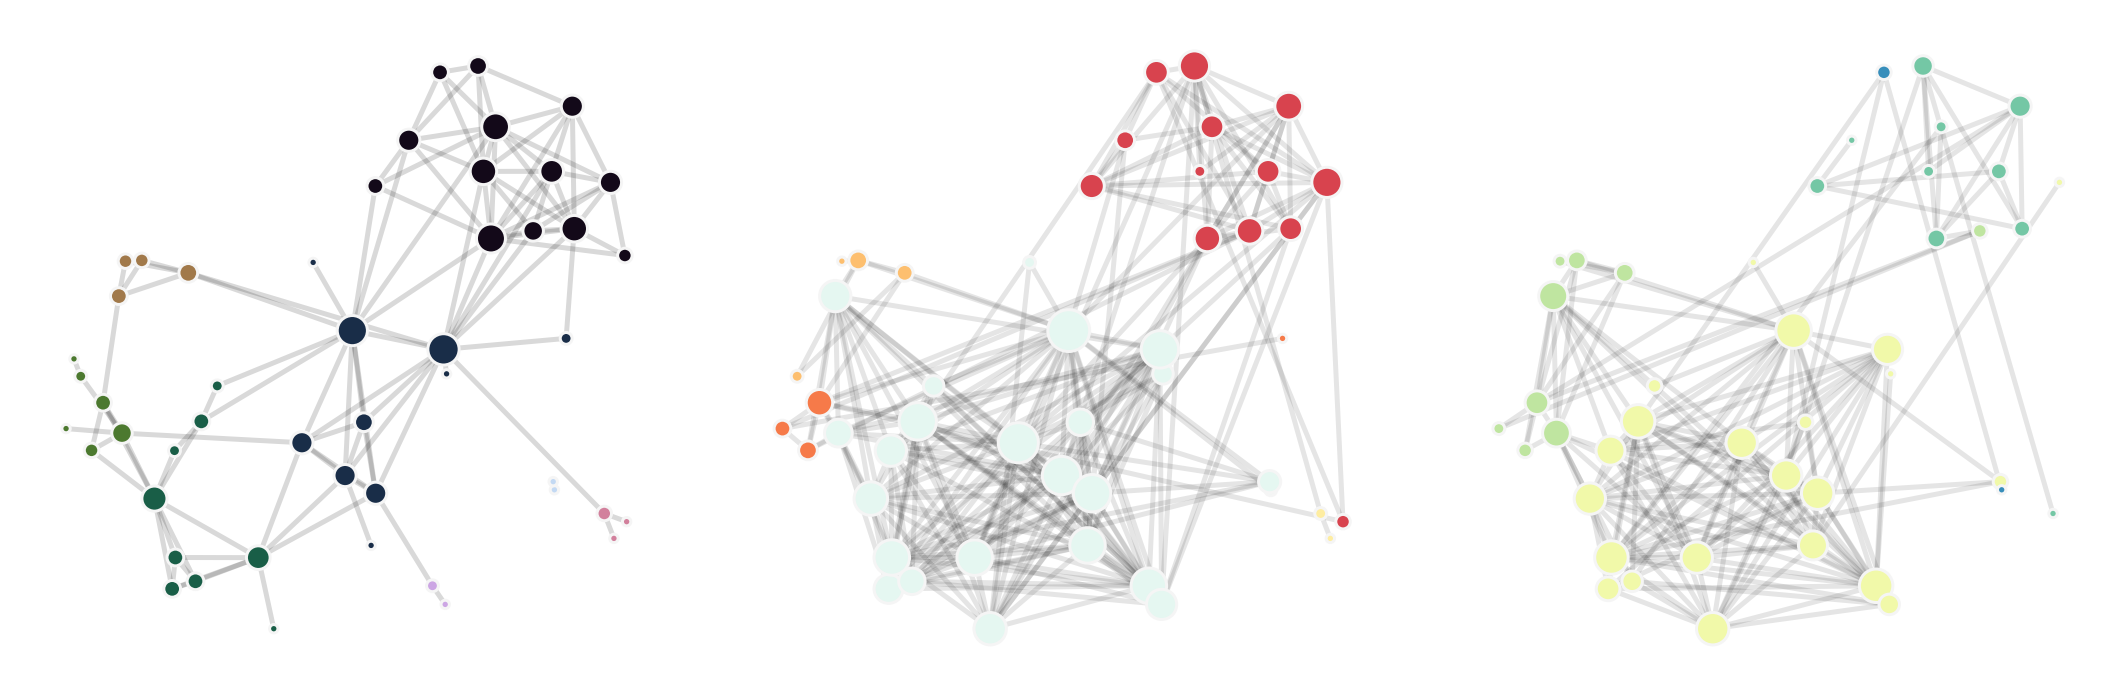

In [238]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,10
fig,ax= plt.subplots(nrows=1, ncols=3)
fig.tight_layout()
values = [eval(colors['T1C'+ str(G1.nodes[node]['community'])][3:]) for node,j in G1.nodes(data=True)]
plt.subplot(131)
plt.axis('off')
nx.draw_networkx_nodes(G1,pos=pos,node_color = values, edgecolors='whitesmoke', linewidths=3,node_size=[70*v for v in dict(G1.degree()).values()])
nx.draw_networkx_edges(G1,pos=pos,alpha=0.15,width=5)

values = [eval(colors['T2C'+ str(G2.nodes[node]['community'])][3:]) if 'T2C'+ str(G2.nodes[node]['community']) in colors.keys() else 'grey' for node,j in G2.nodes(data=True)]
plt.subplot(132)
plt.axis('off')
nx.draw_networkx_nodes(G2,pos=pos,node_color = values, edgecolors='whitesmoke', linewidths=3,node_size=[70*v for v in dict(G2.degree()).values()])
nx.draw_networkx_edges(G2,pos=pos,alpha=0.1,width=5)
values = [eval(colors['T3C'+ str(G3.nodes[node]['community'])][3:]) if 'T3C'+ str(G3.nodes[node]['community']) in colors.keys() else 'blue' for node,j in G3.nodes(data=True)]
plt.subplot(133)
plt.axis('off')
nx.draw_networkx_nodes(G3,pos=pos,node_color = values, edgecolors='whitesmoke', linewidths=3,node_size=[70*v for v in dict(G3.degree()).values()])
nx.draw_networkx_edges(G3,pos=pos,alpha=0.1,width=5)
plt.show()

# Network evolution

In [269]:
df=cate_year.dropna(subset=['Period_3_commu'])[['Background','Year_range']]
common=df.groupby('Background').Year_range.count().to_frame().sort_values(by='Year_range',ascending=False).index.to_list()[:8]
ls=cate_year[~cate_year.Period_1_commu.isna() ].Background.unique()
t2=cate_year[~cate_year.Background.isin(ls)].dropna(subset=['Period_2_commu']).groupby('Background')\
      .Year_range.count().to_frame().sort_values(by='Year_range',ascending=False).index.to_list()[:5]
            
ls=common+t2

In [273]:
ls

['computer science',
 'communication',
 'psychology',
 'business',
 'multidisciplinary sciences',
 'health care sciences & services',
 'public, environmental & occupational health',
 'geography',
 'multidisciplinary sciences',
 'education',
 'geography',
 'urology & nephrology',
 'hospitality']

In [245]:
def year_range(df,Year_range):
  df[str(Year_range)]=[2009 if i==1.0 else i for i in df[str(Year_range)]]
  df[str(Year_range)]=[2014 if i==2.0 else i for i in df[str(Year_range)]]
  df[str(Year_range)]=[2019 if i==3.0 else i for i in df[str(Year_range)]]
  df[str(Year_range)]=[2019 if i==4.0 else i for i in df[str(Year_range)]]
  return df

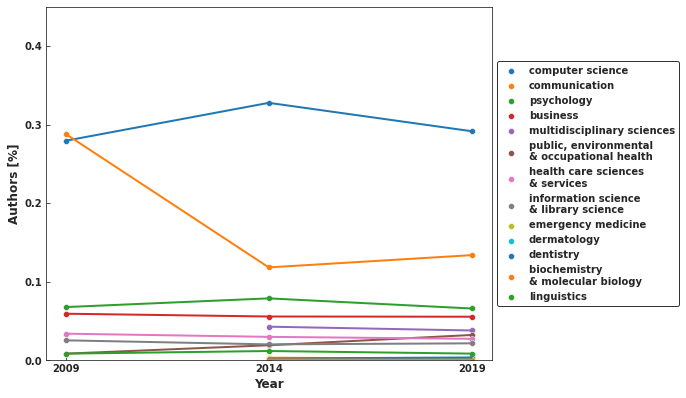

In [244]:
plt.figure(figsize=(8,6.5))
for i in ls:
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.scatterplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), x='Year_range',y='Background', label=i)
    sns.lineplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), linewidth = 2, x='Year_range',y='Background')
legend_properties = {'weight':'bold'}
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop=legend_properties)
legend.get_frame().set_edgecolor('black')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Publication [%]', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylim(0,0.45)
plt.xticks([2009,2014,2019],fontweight='bold')
plt.yticks([0.0,0.1,0.2,0.3,0.4],fontweight='bold')
plt.show()

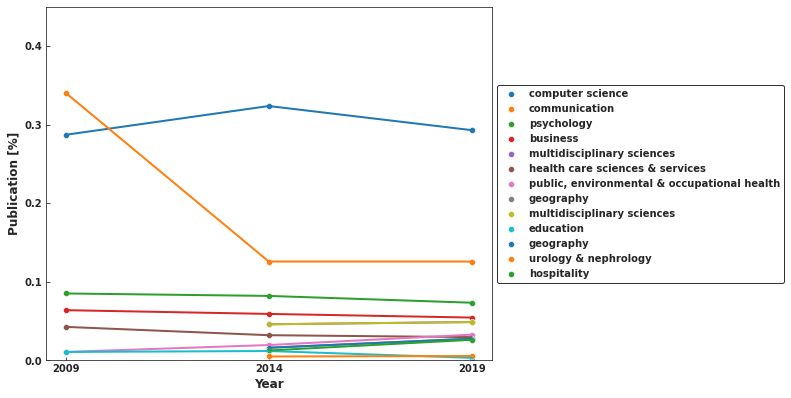

In [272]:
plt.figure(figsize=(8,6.5))
for i in ls:
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.scatterplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), x='Year_range',y='Background', label=i)
    sns.lineplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), linewidth = 2, x='Year_range',y='Background')
legend_properties = {'weight':'bold'}
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop=legend_properties)
legend.get_frame().set_edgecolor('black')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Publication [%]', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylim(0,0.45)
plt.xticks([2009,2014,2019],fontweight='bold')
plt.yticks([0.0,0.1,0.2,0.3,0.4],fontweight='bold')
plt.show()

In [274]:
df=cate_bc.dropna(subset=['Period_3_commu'])[['Background','Year_range']]
common=df.groupby('Background').Year_range.count().to_frame().sort_values(by='Year_range',ascending=False).index.to_list()[:8]
ls=cate_bc[~cate_bc.Period_1_commu.isna() ].Background.unique()
t2=cate_bc[~cate_bc.Background.isin(ls)].dropna(subset=['Period_2_commu']).groupby('Background')\
      .Year_range.count().to_frame().sort_values(by='Year_range',ascending=False).index.to_list()[8:13]
            
ls=common+t2

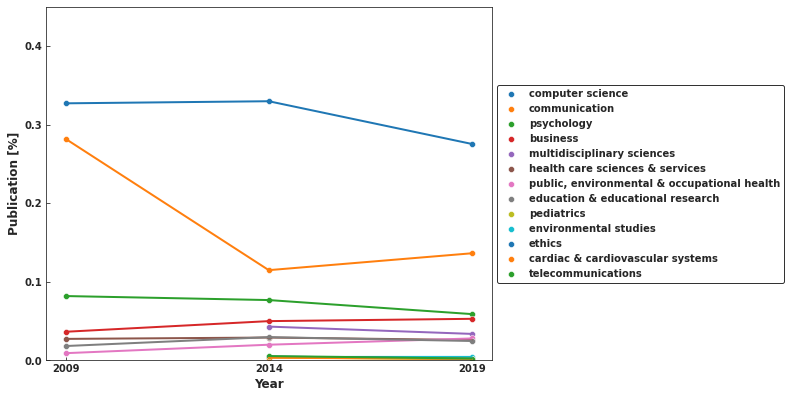

In [275]:
df=year_range(df,'Year_range')
plt.figure(figsize=(8,6.5))
for i in ls:
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.scatterplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), x='Year_range',y='Background', label=i)
    sns.lineplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), linewidth = 2, x='Year_range',y='Background')
legend_properties = {'weight':'bold'}
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop=legend_properties)
legend.get_frame().set_edgecolor('black')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Publication [%]', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylim(0,0.45)
plt.xticks([2009,2014,2019],fontweight='bold')
plt.yticks([0.0,0.1,0.2,0.3,0.4],fontweight='bold')
plt.show()

In [277]:
author_3=pd.read_csv("/content/drive/My Drive/Colab Notebooks/cate_au.csv")

In [279]:
common=author_3.groupby('Background').Index.count().to_frame().sort_values(by='Index',ascending=False).index.to_list()[:8]
ls=list(author_3[~author_3.Period_1_commu.isna() ].Background.unique())
t2=author_3[~author_3.Background.isin(ls)].dropna(subset=['Period_2_commu']).groupby('Background')\
      .Index.count().to_frame().sort_values(by='Index',ascending=False).index.to_list()[5:8]
            
l=common+t2

In [284]:
author_1=author_3.dropna().copy()
author_2=author_3.dropna(subset=['Period_2_commu']).copy()
author_1['Year_range']=[1.0 for i in range(len(author_1))]
author_2['Year_range']=[2.0 for i in range(len(author_2))]
author_3['Year_range']=[3.0 for i in range(len(author_3))]
df=pd.concat([author_3,author_1,author_2])

In [287]:
df=year_range(df,'Year_range')

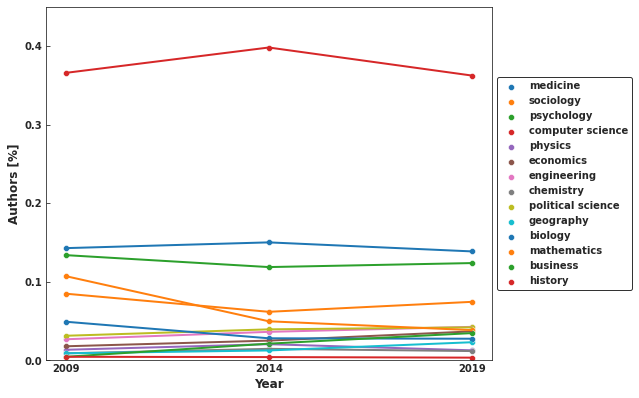

In [288]:
plt.figure(figsize=(8,6.5))
for i in ls:
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.scatterplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), x='Year_range',y='Background', label=i)
    sns.lineplot(data=df[df['Background'] ==i ].groupby('Year_range').count().div(df.groupby('Year_range').count()).reset_index(), linewidth = 2, x='Year_range',y='Background')
legend_properties = {'weight':'bold'}
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop=legend_properties)
legend.get_frame().set_edgecolor('black')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Authors [%]', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylim(0,0.45)
plt.xticks([2009,2014,2019],fontweight='bold')
plt.yticks([0.0,0.1,0.2,0.3,0.4],fontweight='bold')
plt.show()